In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlsxwriter
import seaborn as sns
from scipy import stats

In [2]:
# read in the entire dataset
master = pd.read_excel('..\Data Cleanup\cleaned_data.xlsx', sheet_name = 'master')

master = master[(master['EffMeas'] == 'LR')]

24


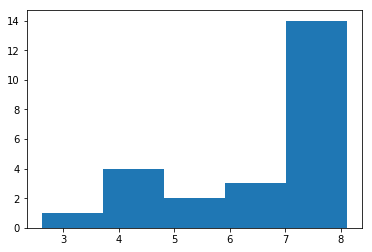

In [3]:
d = master[(master['AppMethod'] == 'liquid immersion') & (master['UndergroundCarpet'] == 1) & (master['ConcDoseUn'] == 'g/mL') & 
          (master['ConcDose'] < 0.003)]

print(d.Eff.shape[0])

plt.hist(d.Eff.dropna(), bins=5)
plt.show()

25


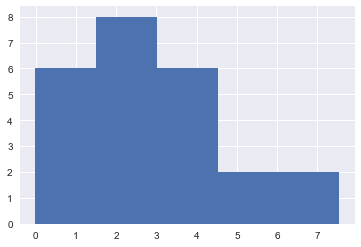

In [6]:
d = master[(master['AppMethod'] == 'liquid immersion') & (master['UndergroundCarpet'] == 1) & (master['ConcDoseUn'] == 'g/mL') & 
          (master['ConcDose'] > 0.003)]

print(d.Eff.shape[0])

plt.hist(d.Eff.dropna(),bins=5)
plt.show()

C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


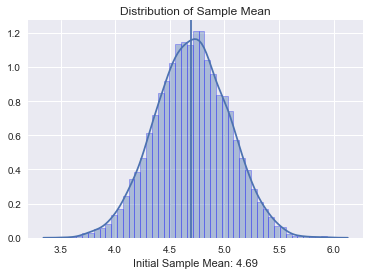

In [10]:
d = master[(master['AppMethod'] == 'liquid immersion') & (master['UndergroundCarpet'] == 1) & (master['ConcDoseUn'] == 'g/mL')]

sns.set(style="darkgrid")

xbar_init = np.round(np.mean(d.Eff.dropna()), 2)

# generate 5000 resampled sample means  =>
means = [np.mean(np.random.choice(d.Eff.dropna(),size=len(d.Eff.dropna()),replace=True)) for i in range(5000)]

# make a histogram of the means
sns.distplot(means, kde=True, hist_kws=dict(edgecolor="b", linewidth=.675))
plt.xlabel("Initial Sample Mean: {}".format(xbar_init))
plt.title("Distribution of Sample Mean")
plt.axvline(x=xbar_init) # vertical line at xbar_init
plt.show()